In [1]:
import cmocean
import matplotlib.pyplot as plt

from kalpana.export import fort14togdf
from kalpana.plotting import plot_mesh

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import imread
from cartopy.io.shapereader import Reader
import matplotlib as mpl
from cartopy.feature import ShapelyFeature
import shapely.vectorized
import netCDF4 as netcdf
from kalpana.plotting import plot_nc

# Plot the Unstructured Mesh

In [5]:
from pylab import mpl
import matplotlib.pyplot as plt
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)
plt.rcParams['text.usetex'] = False

<Figure size 3840x2880 with 0 Axes>

In [5]:
## path of the input fort 14 file
filein = r'./fort.14'

## coordinate system of the fort14 input
epsgIn = 4326

## coordinate system of the output shapefile
epsgOut = 4326

## call fort14togdf() to create a geodataframe object
gdf = fort14togdf(filein, epsgIn, epsgOut, fileintype='fort.14')

<Figure size 640x480 with 0 Axes>

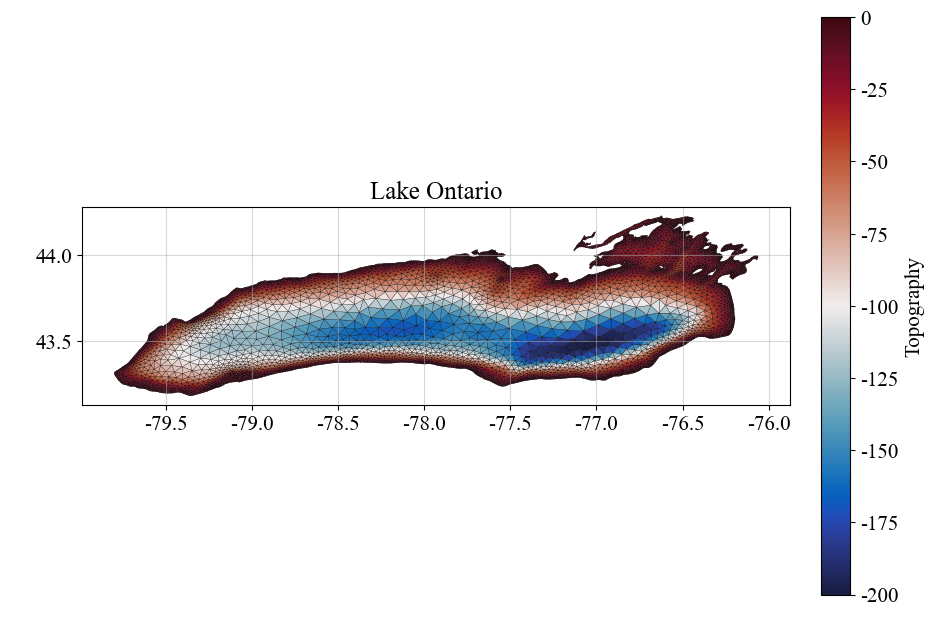

In [9]:
import matplotlib as mpl
import numpy as np
plt.tight_layout()
aspectRatio = 10/7.5
fig, ax = plt.subplots(figsize = (10, 7.5))
plot_mesh(gdf, background = False, cbar = True, lw = 0.2, cmap = cmocean.cm.balance, vmax = 0, vmin = -200,  xlabel = ' ', ylabel = ' ', ax = ax, cbar_label = 'Topography')
# ax.colorbar(im, shrink=0.5)
ax.set_title('Lake Ontario')
ax.grid(alpha = 0.5)
picname = "topo.png"
fig.savefig(picname)

## Plot Contour Maps

In [9]:
import netCDF4 as netcdf
import matplotlib.pyplot as plt
from kalpana.plotting import plot_nc
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

nc_file = r'./maxele.63.nc'
nc_file = netcdf.Dataset(nc_file, 'r')
nc_file

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    _FillValue: -99999.0
    model: ADCIRC
    version: unknown
    git_hash: unknown
    grid_type: Triangular
    description: SL IsoT NOSWAN LOs  ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    agrid: OceanMesh2D
    rundes: SL IsoT NOSWAN LOs  ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    runid: ADCIRC V56.02                ! 20 CHARACTER ALPANUMERIC RUN IDENTIFICATION
    title: BYY
    institution: MU
    source: OceanMesh2D
    history: History: None
    references: https://mgyby.github.io/boyuanyu.github.io/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2024-12-23 20:20:02 -05:00
    modification_date: 2024-12-23 20:20:02 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 2.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 0
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor

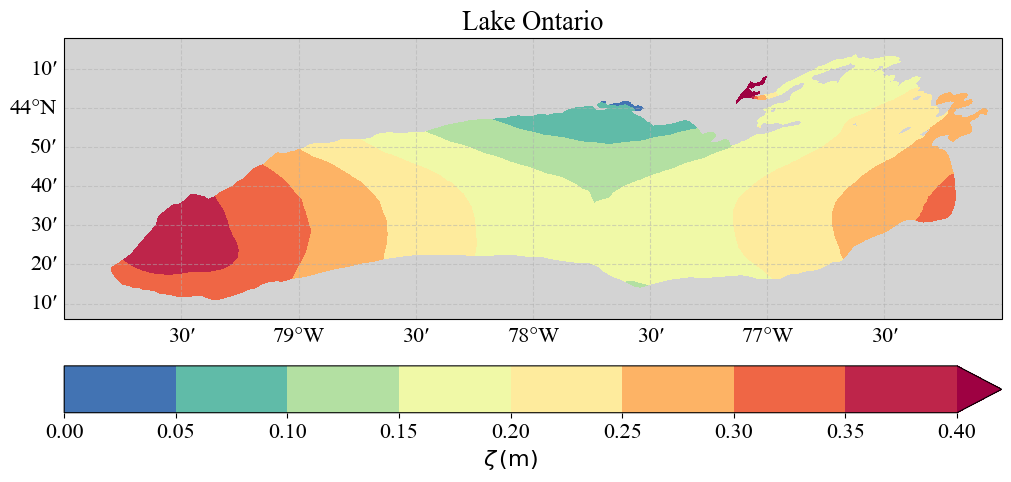

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import imread
from cartopy.io.shapereader import Reader
import matplotlib as mpl
from cartopy.feature import ShapelyFeature
import shapely.vectorized

plt.rcParams['text.usetex'] = False

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize = (10,5), subplot_kw={'projection': ccrs.PlateCarree()}, 
                    constrained_layout=True)

ax.set_extent([-76,-80,43.1,44.30],crs=ccrs.PlateCarree())
# ax.set_xticks(np.arange(-80,-76+1,1.0))
# ax.set_yticks(np.arange(43,44.5+0.5,0.5))
# # not showing NSEW
# cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
# lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
# lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

# plot_nc(nc_file, 'zeta_max', levels = np.arange(0, 0.45, 0.05), background_map = True, cbar = True, cb_label = r'$\zeta\, (\rm{m})$',
#         ax = ax, fig = fig, cmap='Spectral_r', extend='max')
plot_nc(nc_file, 'zeta_max', levels = np.arange(0, 0.45, 0.05), background_map = True, 
        cbar = True, cb_label = r'$\zeta\, (\rm{m})$', cbar_ori=False, ax = ax, fig = fig, cmap='Spectral_r', extend='max')

# shp_file = r'./GSHHS_l_L1.shp'
# shape_feature = ShapelyFeature(Reader(shp_file).geometries(), proj, facecolor='none')
# ax.add_feature(shape_feature)

# ax.add_feature(cfeat.LAND.with_scale('50m'), zorder=1)

# ax.set_title(r'{$\zeta$ (\rm{m})}')
# ax.set_title(r'Zeta')
ax.set_title('Lake Ontario')
ax.grid(alpha = 0.5)

fig.savefig('max_depth.jpeg', dpi=800)

## Plot the depth contours for different times

In [31]:
def plot_contours_nc(file_name, plot_var, time_step, range_min, range_max, save_name):
    # Set font properties globally
    plt.rcParams['font.family'] = "Times New Roman"
    # Set font properties globally
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(dpi=600)
    plt.rcParams['text.usetex'] = False

    fig, ax = plt.subplots(figsize = (10,5), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
    
    ax.set_extent([-76,-80,43.1,44.30],crs=ccrs.PlateCarree())
    # ax.set_xticks(np.arange(-80,-76+1,1.0))
    # ax.set_yticks(np.arange(43,44.5+0.5,0.5))
    # # not showing NSEW
    # cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
    # lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
    # lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
    # ax.xaxis.set_major_formatter(lon_formatter)
    # ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    # ax.yaxis.set_major_formatter(lat_formatter)
    # ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    plot_step = (range_max-range_min)/25
    plot_nc(file_name, plot_var, levels = np.arange(range_min, (range_max+plot_step), plot_step), background_map = True, 
            cbar = True, cb_label = r'$\zeta\, (\rm{m})$', cbar_ori=False, ax = ax, fig = fig, cmap='Spectral_r',extend='both', ts=time_step)
    
    # ax.set_title(r'{$\zeta$ (\rm{m})}')
    # ax.set_title(r'Zeta')
    ax.set_title('Lake Ontario')
    ax.grid(alpha = 0.5)

    fig.savefig(save_name, dpi=800)

In [7]:
fort63_file = r'./fort.63.nc'
fort63_nc_file = netcdf.Dataset(fort63_file, 'r')
fort63_nc_file

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    _FillValue: -99999.0
    model: ADCIRC
    version: unknown
    git_hash: unknown
    grid_type: Triangular
    description: SL IsoT NOSWAN LOs  ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    agrid: OceanMesh2D
    rundes: SL IsoT NOSWAN LOs  ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    runid: ADCIRC V56.02                ! 20 CHARACTER ALPANUMERIC RUN IDENTIFICATION
    title: BYY
    institution: MU
    source: OceanMesh2D
    history: History: None
    references: https://mgyby.github.io/boyuanyu.github.io/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2024-12-23 20:12:05 -05:00
    modification_date: 2024-12-23 20:12:05 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 2.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 0
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor

<Figure size 3840x2880 with 0 Axes>

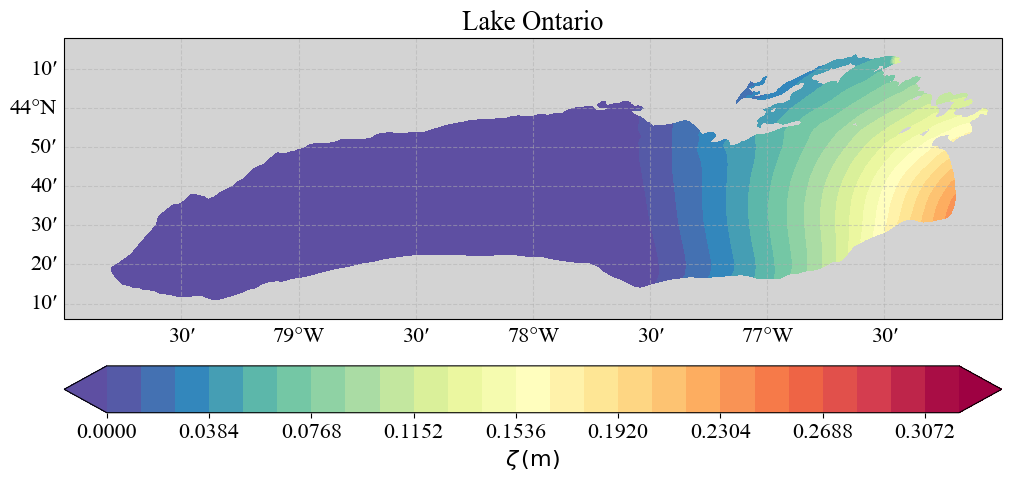

In [39]:
plot_contours_nc(fort63_nc_file, 'zeta', 119, 0, 0.32, 'nout=120.jpeg')

## Add Hurricane Path

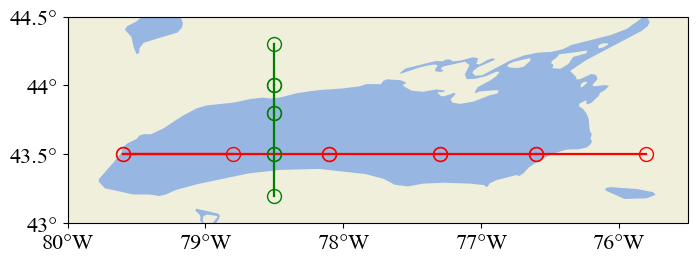

In [67]:
# plot shape file of Lake Ontario
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection=proj)

ax.set_extent([-75.5,-80,43,44.5],crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(-80,-76+1,1.0))
ax.set_yticks(np.arange(43,44.5+0.5,0.5))
# not showing NSEW
cardinal_labels = {"east": "", "west": "W", "north": "", "south": ""}
lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.coastlines()
ax.add_feature(cfeat.LAND.with_scale('50m'), zorder=1)
ax.add_feature(cfeat.LAKES.with_scale('50m'), zorder=1)

shp_file = r'./GSHHS_l_L1.shp'
shape_feature = ShapelyFeature(Reader(shp_file).geometries(), proj, facecolor='none')
# ax.add_feature(shape_feature)

# path 1
lonTC = np.array([-78.8, -79.6, -78.1, -77.3, -76.6, -75.8])
latTC = 43.5*np.ones(6)
lonTC2 = -78.5*np.ones(5)
latTC2 = np.array([43.2, 43.5, 43.8, 44.0, 44.3])
for i in range(1, len(lonTC)):
    ax.plot((lonTC[i-1], lonTC[i]), (latTC[i-1], latTC[i]), color='r', lw=1.60, marker="o", markersize=10, fillstyle='none')

for i in range(1, len(lonTC2)):
    ax.plot((lonTC2[i-1], lonTC2[i]), (latTC2[i-1], latTC2[i]), color='g', lw=1.60, marker="o", markersize=10, fillstyle='none')

fig.savefig('path.jpeg', dpi=600)